In [9]:
import pandas as pd

df = pd.read_csv(r"C:\Users\hp\workspace\aadhaar_analytics\data\processed\master_train_clean.csv") 
df.columns
#df.head()

Index(['date', 'state', 'district', 'pincode', 'bio_age_5_17', 'bio_age_17_',
       'source_file', 'demo_age_5_17', 'demo_age_17_', 'age_0_5', 'age_5_17',
       'age_18_greater'],
      dtype='object')

In [5]:
age_summary = {
    'Age 5–17': df['bio_age_5_17'].sum(),
    'Age 17+': df['bio_age_17_'].sum()
}
import pandas as pd

age_df = pd.DataFrame(
    list(age_summary.items()),
    columns=['Age Group', 'Total Activity']
)


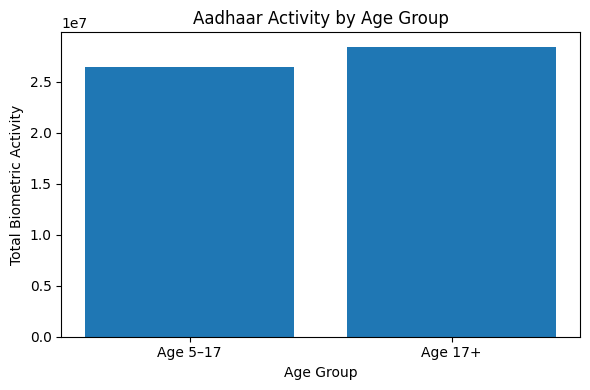

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.bar(age_df['Age Group'], age_df['Total Activity'])
plt.title('Aadhaar Activity by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Biometric Activity')
plt.tight_layout()
plt.show()


In [10]:
import pandas as pd

pf = pd.read_csv(r"C:\Users\hp\workspace\aadhaar_analytics\data\processed\state_monthly.csv") 
pf.columns


Index(['state', 'year', 'month', 'total_activity', 'age_group', 'pct_of_india',
       'mom_change_pct'],
      dtype='object')

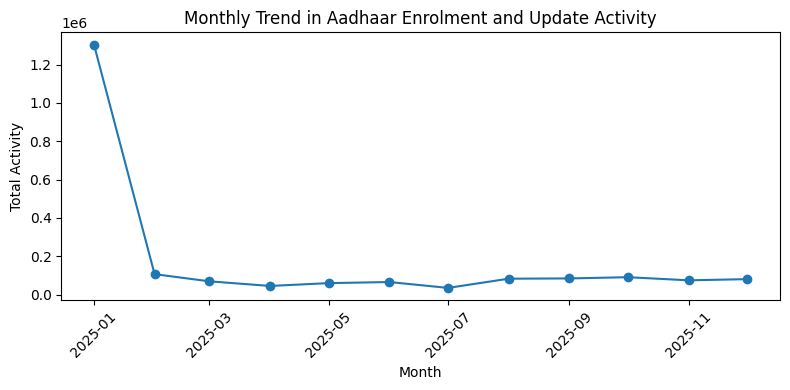

In [11]:
pf['date'] = pd.to_datetime(
    pf['year'].astype(str) + '-' + pf['month'].astype(str) + '-01'
) 
monthly_trend = (
    pf.groupby('date', as_index=False)
      .agg({'total_activity': 'sum'})
      .sort_values('date')
)
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.plot(
    monthly_trend['date'],
    monthly_trend['total_activity'],
    marker='o'
)
plt.title('Monthly Trend in Aadhaar Enrolment and Update Activity')
plt.xlabel('Month')
plt.ylabel('Total Activity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [16]:
state_name = 'Andaman & Nicobar Islands'

state_df = pf[pf['state'] == state_name].copy()

state_monthly = (
    state_df
    .groupby('date', as_index=False)
    .agg({'total_activity': 'sum'})
    .sort_values('date')
)


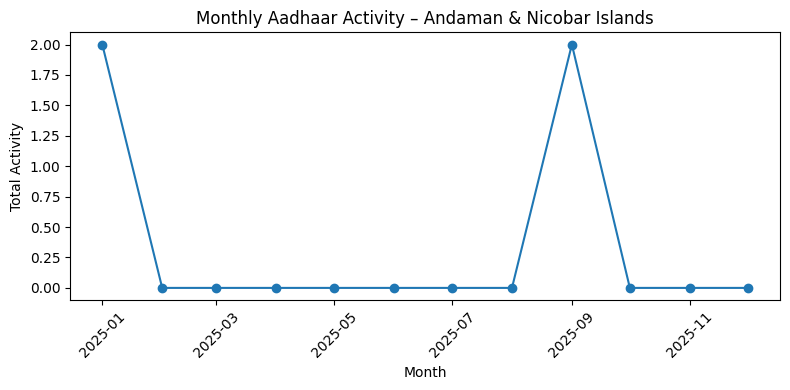

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.plot(
    state_monthly['date'],
    state_monthly['total_activity'],
    marker='o'
)
plt.title(f'Monthly Aadhaar Activity – {state_name}')
plt.xlabel('Month')
plt.ylabel('Total Activity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
